In [78]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy.stats import stats
from scipy.stats import ttest_ind


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [79]:
data = pd.read_csv('train.csv')

In [80]:
data.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2018-109484,06/11/2018,12/11/2018,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206.0,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820
96,97,CA-2018-161018,09/11/2018,11/11/2018,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,New York,10009.0,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300
97,98,CA-2018-157833,17/06/2018,20/06/2018,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122.0,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120
98,99,CA-2017-149223,06/09/2017,11/09/2017,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,Minnesota,55106.0,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [82]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [83]:
data.fillna(0, inplace=True)

In [84]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [85]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [86]:
# Create a feature for shipping time (days)
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Extract year and month for time-based analysis
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

In [87]:
print(data.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Shipping Time             int64
Order Year                int32
Order Month               int32
dtype: object


In [88]:
# Summary statistics for numerical columns
numerical_cols = ['Sales', 'Shipping Time']
print("\nSummary Statistics for Numerical Variables:")
print(data[numerical_cols].describe())

# Additional measures
print("\nMode of Sales:", data['Sales'].mode()[0])
print("Mode of Shipping Time:", data['Shipping Time'].mode()[0])
print("Variance of Sales:", data['Sales'].var())
print("Variance of Shipping Time:", data['Shipping Time'].var())
print("Skewness of Sales:", data['Sales'].skew())
print("Kurtosis of Sales:", data['Sales'].kurtosis())


Summary Statistics for Numerical Variables:
              Sales  Shipping Time
count   9800.000000    9800.000000
mean     230.769059       3.961122
std      626.651875       1.749614
min        0.444000       0.000000
25%       17.248000       3.000000
50%       54.490000       4.000000
75%      210.605000       5.000000
max    22638.480000       7.000000

Mode of Sales: 12.96
Mode of Shipping Time: 4
Variance of Sales: 392692.5722389889
Variance of Shipping Time: 3.0611478368262914
Skewness of Sales: 12.983482865034619
Kurtosis of Sales: 304.4450883210413


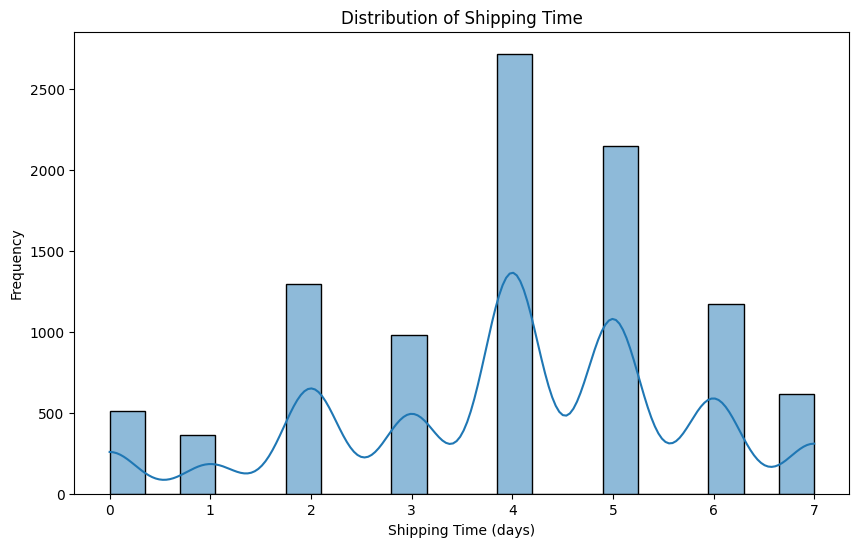

In [55]:
# Histogram for Shipping Time
plt.figure(figsize=(10, 6))
sns.histplot(data['Shipping Time'], bins=20, kde=True)
plt.title('Distribution of Shipping Time')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Frequency')
plt.show()

In [89]:
# Frequency tables
categorical_cols = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode', 'Order Year']
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(data[col].value_counts())


Frequency Distribution for Category:
Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

Frequency Distribution for Sub-Category:
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

Frequency Distribution for Region:
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

Frequency Distribution for Segment:
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

Frequency Distribution for Ship Mode:
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

Fr

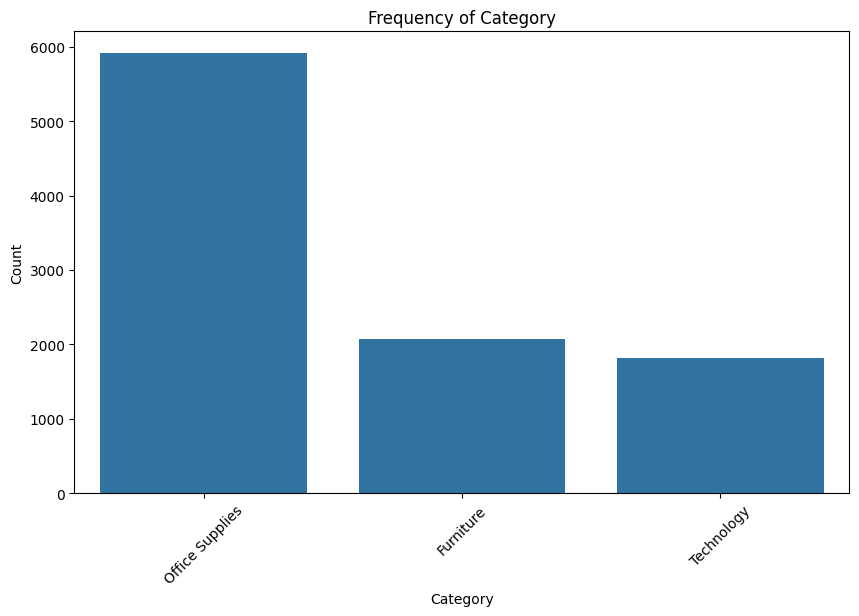

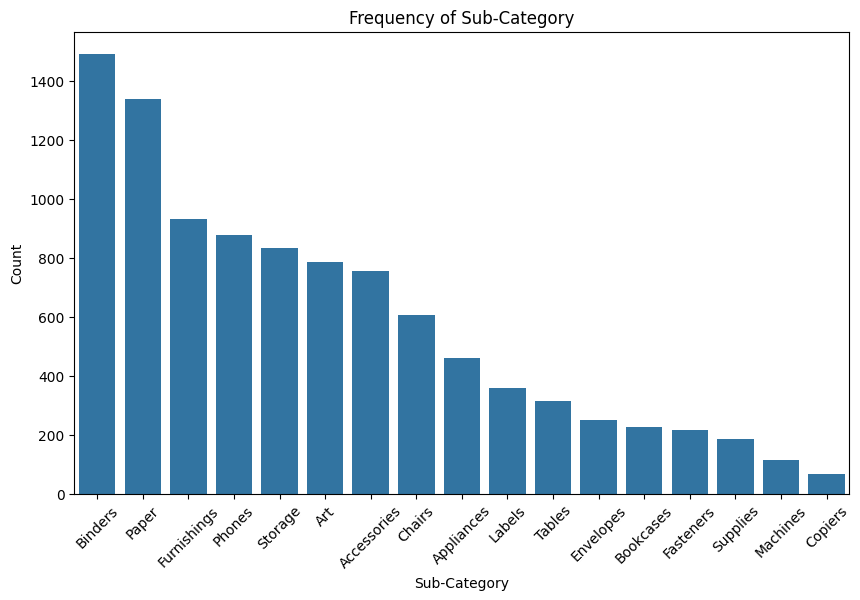

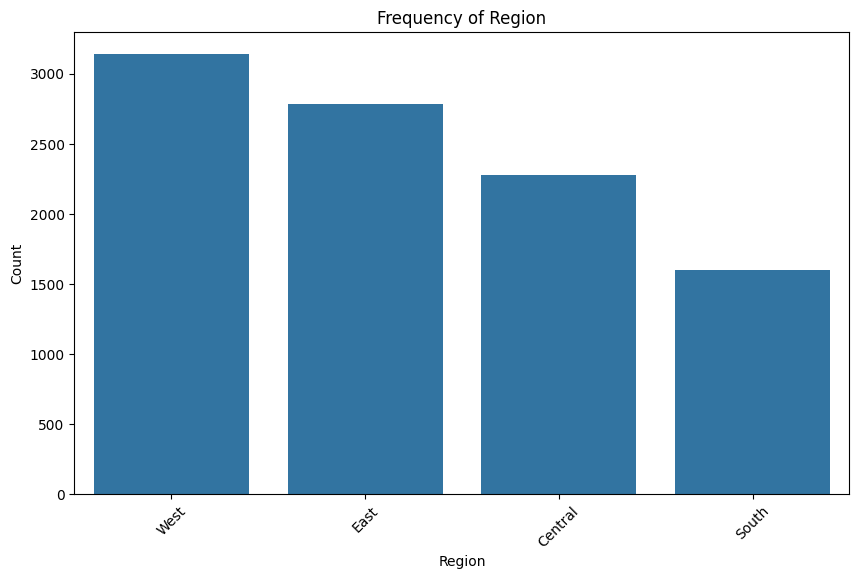

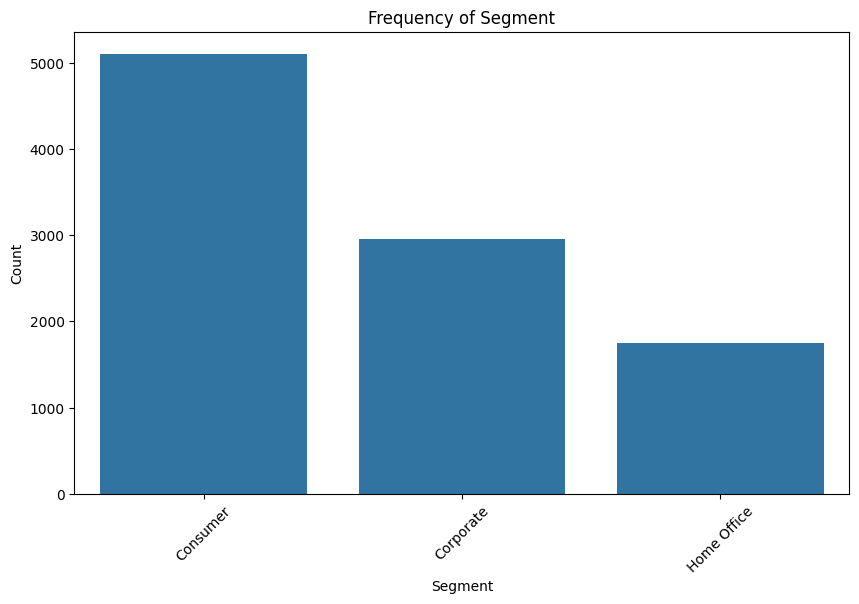

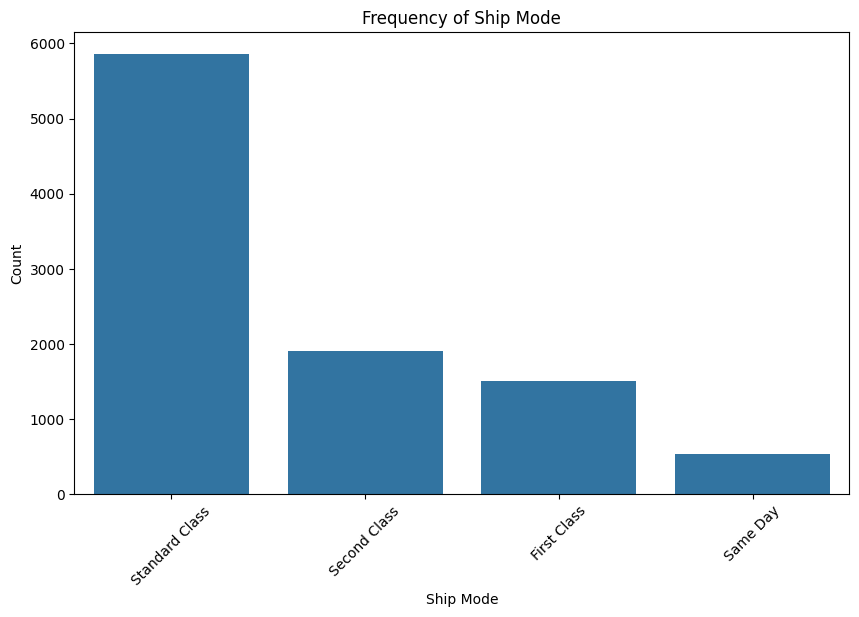

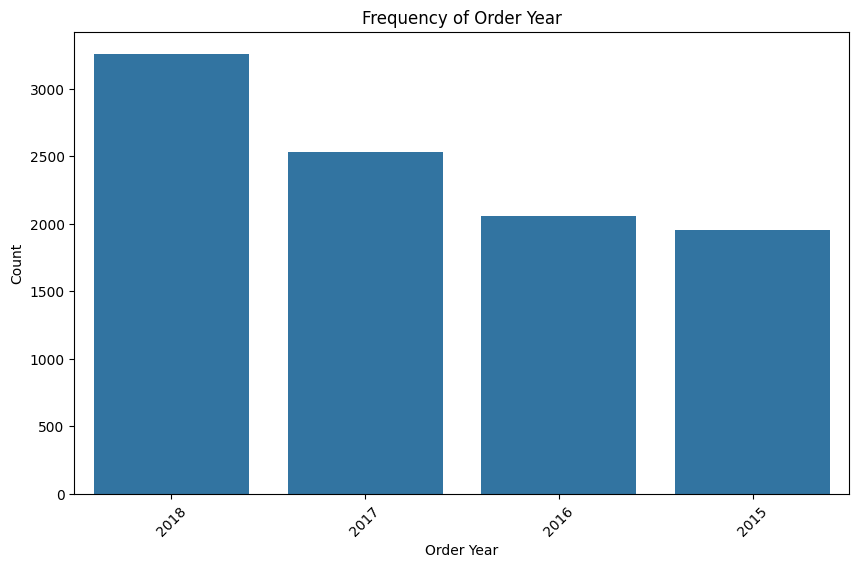

In [90]:
# Bar plot for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Cross-Tabulation of Category and Region:
Region           Central  East  South  West
Category                                   
Furniture            470   591    326   691
Office Supplies     1399  1667    983  1860
Technology           408   527    289   589

Cross-Tabulation of Segment and Ship Mode:
Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer             755       312          1003            3031
Corporate            468       114           589            1782
Home Office          278       112           310            1046


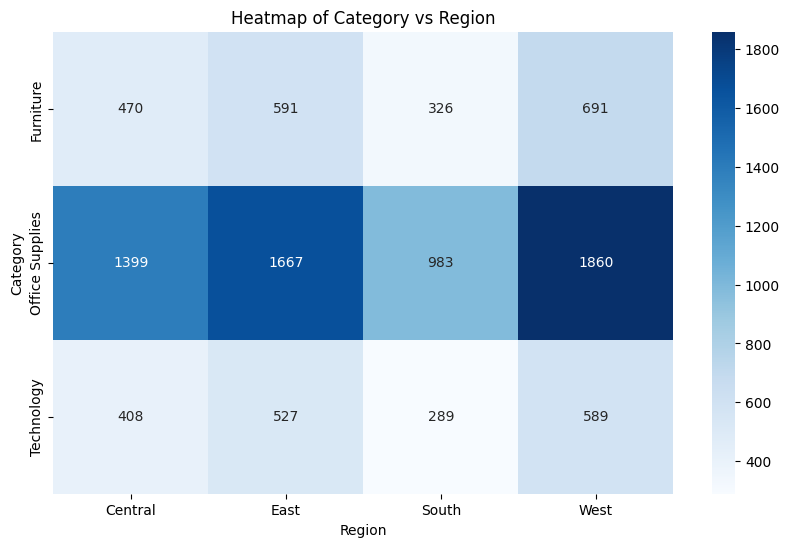

In [91]:
# Cross-tabulation of Category and Region
print("\nCross-Tabulation of Category and Region:")
print(pd.crosstab(data['Category'], data['Region']))

# Cross-tabulation of Segment and Ship Mode
print("\nCross-Tabulation of Segment and Ship Mode:")
print(pd.crosstab(data['Segment'], data['Ship Mode']))

# Visualize cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(data['Category'], data['Region']), annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Category vs Region')
plt.xlabel('Region')
plt.ylabel('Category')
plt.show()

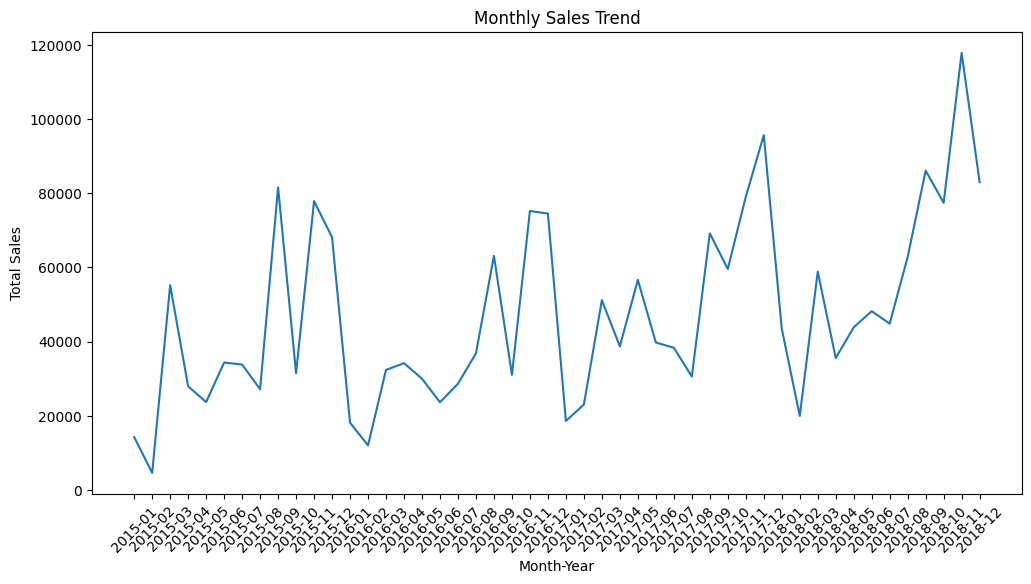

In [92]:
# Aggregate sales by month
data['Order Month-Year'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Order Month-Year')['Sales'].sum().reset_index()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Month-Year'].astype(str), monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

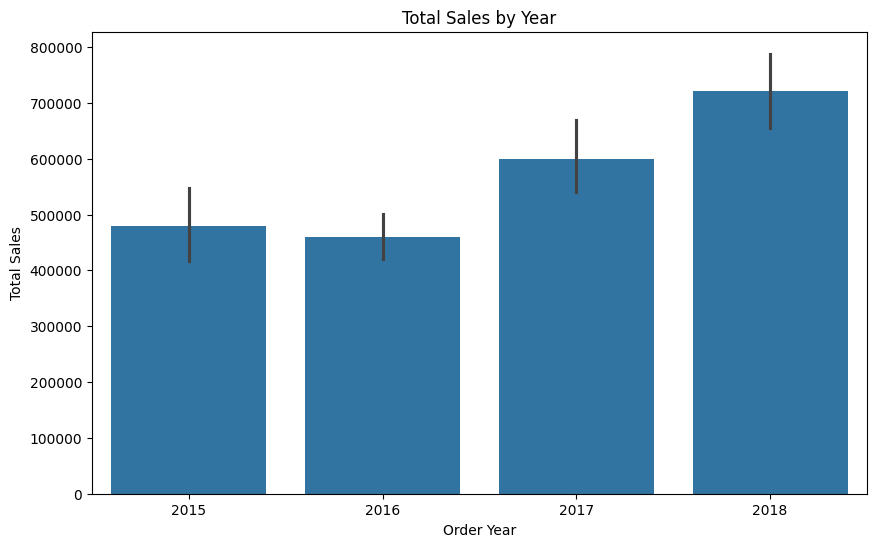

In [93]:
# Sales by Order Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Year', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Sales')
plt.show()

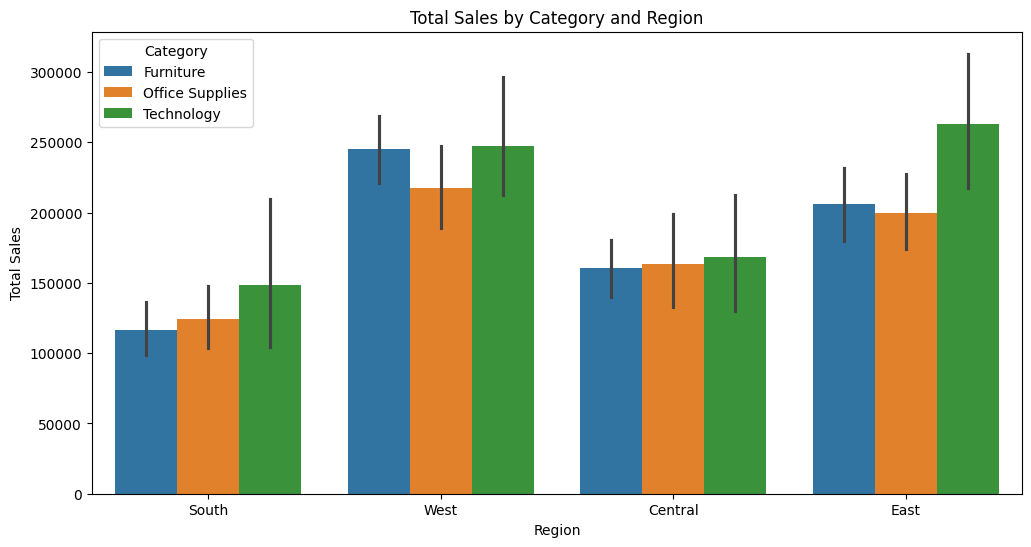

In [94]:
# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=data, estimator=sum)
plt.title('Total Sales by Category and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

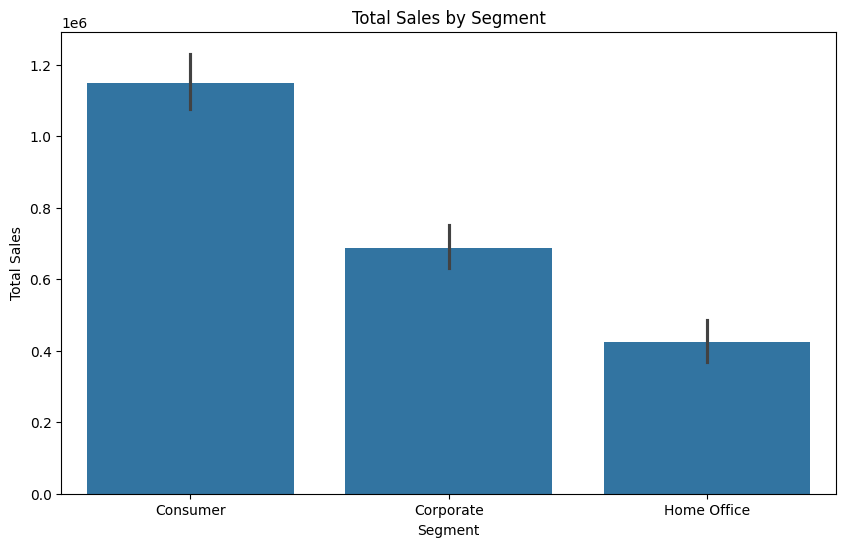

In [95]:
# Bar plot of Sales by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

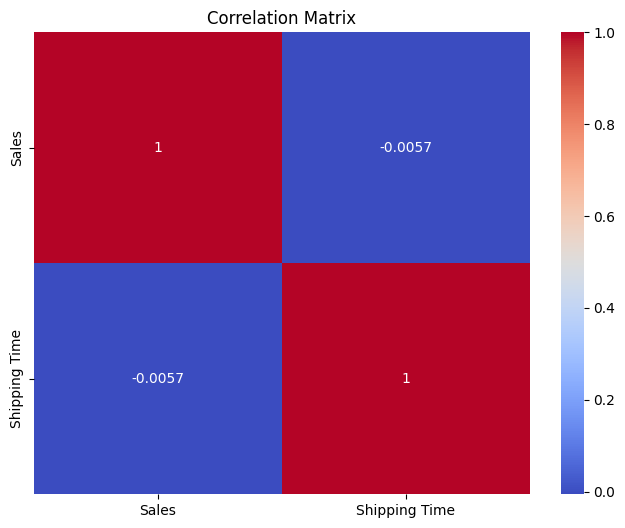

In [96]:
# Correlation matrix for numerical variables
corr = data[['Sales', 'Shipping Time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [97]:
# Top 5 products by sales
print("\nTop 5 Products by Total Sales:")
print(data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head())

# Top 5 customers by sales
print("\nTop 5 Customers by Total Sales:")
print(data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head())


Top 5 Products by Total Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

Top 5 Customers by Total Sales:
Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


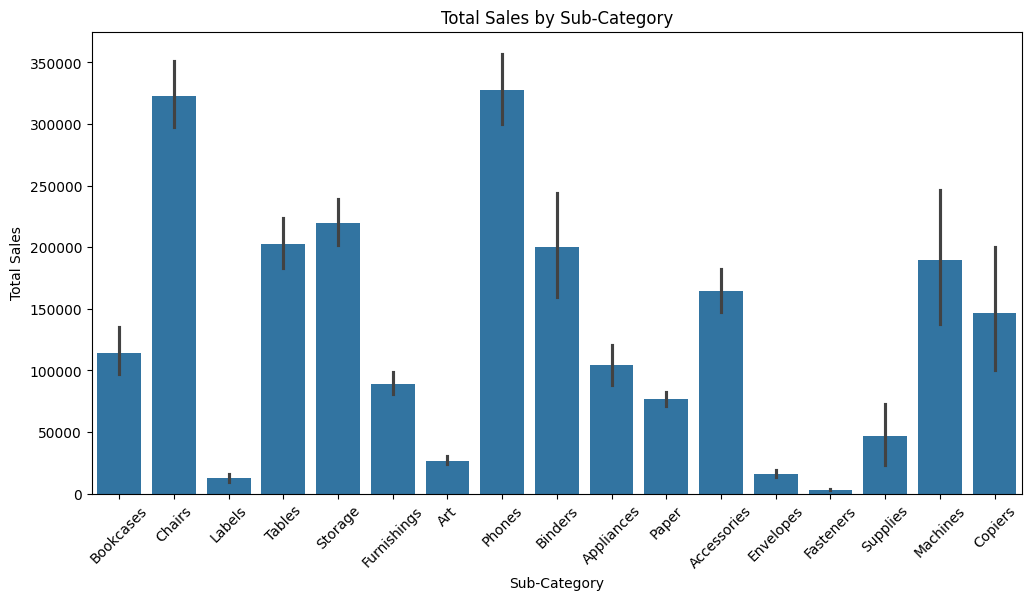

In [98]:
# Bar plot of Sales by Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [99]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Shipping Time', 'Order Year', 'Order Month',
       'Order Month-Year'],
      dtype='object')


**Hypothesis using t-test**

Null (H₀)	The average sales in the East and West regions are equal


Alternative (H₁)	The average sales in the East and West regions are
significantly different

Is there a significant difference in average Sales between customers in the East and West regions?

In [100]:
# Filter sales data for East and West regions
east_sales = data[data['Region'] == 'East']['Sales']
west_sales = data[data['Region'] == 'West']['Sales']

# Perform Welch’s t-test
t_stat, p_val = stats.ttest_ind(east_sales, west_sales, equal_var=False)

# Output the result
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("✅ Significant difference in average sales between East and West — reject H₀")
else:
    print("❌ No significant difference in average sales between East and West — fail to reject H₀")

T-statistic: 0.9407263776911579
P-value: 0.3468867782877927
❌ No significant difference in average sales between East and West — fail to reject H₀


<ipython-input-100-28926f683889>:6: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_val = stats.ttest_ind(east_sales, west_sales, equal_var=False)


Machine Learning Algorithm - Linear Regression

In [102]:
# Select relevant features
features = ['Shipping Time', 'Order Year', 'Order Month']
categorical = ['Region', 'Category', 'Segment']

# Convert categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data[categorical], drop_first=True)

# Combine features
X = pd.concat([data[features], data_encoded], axis=1)
y = data['Sales']


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R² Score):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 640944.3137523587
R-squared (R² Score): 0.04107644561267432


In [106]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

                    Feature  Coefficient
7       Category_Technology    78.391506
3               Region_East    18.347007
5               Region_West     8.237314
9       Segment_Home Office     5.138242
4              Region_South     2.705590
2               Order Month     0.707144
8         Segment_Corporate     0.046713
0             Shipping Time    -0.199171
1                Order Year    -3.568725
6  Category_Office Supplies  -227.254505


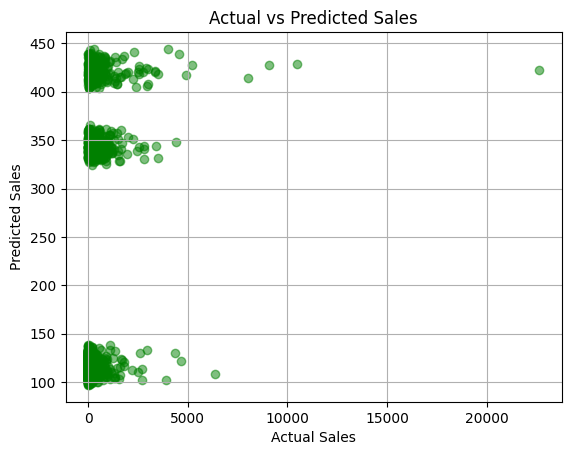

In [107]:
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()